In [1]:
from PyEIS.PyEIS import *

In [2]:
path=r"C:\Users\cjang\Desktop\impedance_data\data\\"
data = ['DE_40_2_60.mpt']

In [3]:
re = EIS_exp(path, data)

cycle || No. RC-elements ||   u
[1]            11            0.87


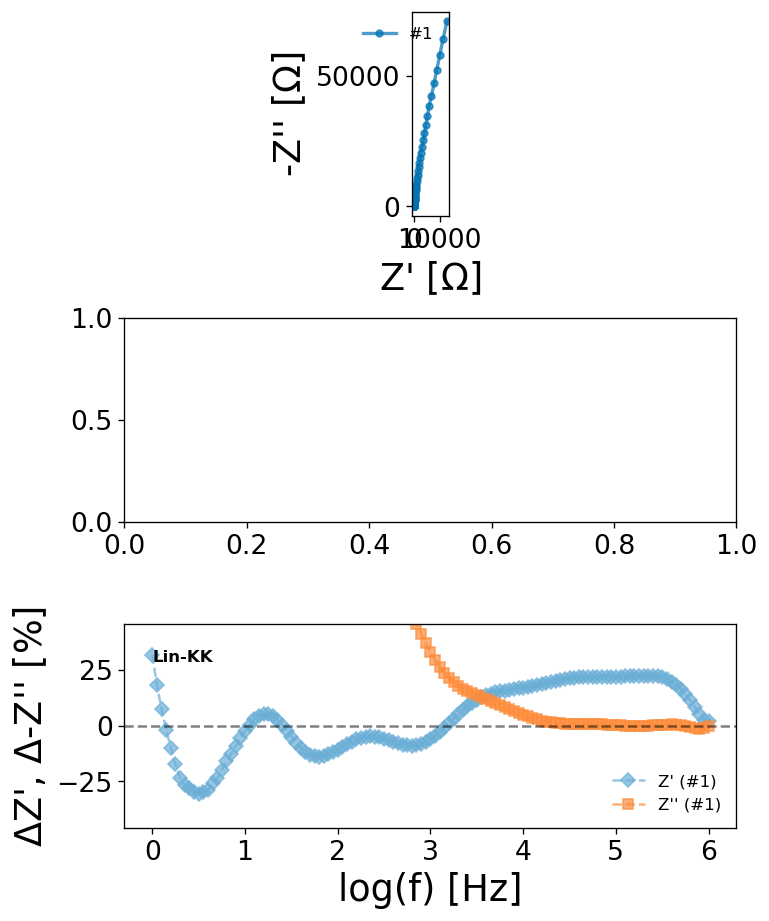

In [4]:
(re.Lin_KK(plot = 'w_data'))

In [15]:
adj_re = EIS_exp(path,data,mask = [10**6, 10**3.5])

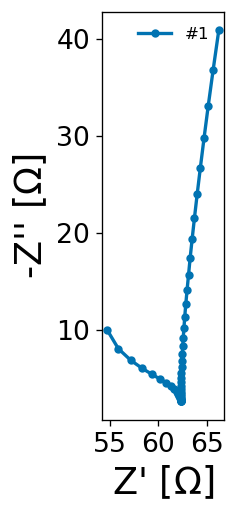

In [16]:
adj_re.EIS_plot()

In [17]:
#USES THE EIS FITTING FUNCTION TO PREDICT THE FREQUENCIES OF THE MPT FILE

#INITIAL ARBITRARY GUESSES
#WILL CREATE A MANUAL FUNCTION THAT CAN ADJUST THE INITIAL GUESSES BUT FOR RIGHT NOW, RUN WITH THESE
Rs_guess = 10

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2



#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params = Parameters()
params.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)
params.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.65, max=1.2)
params.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.EIS_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38
    # data points      = 98
    # variables        = 7
    chi-square         = 2079492.52
    reduced chi-square = 22851.5662
    Akaike info crit   = 990.341362
    Bayesian info crit = 1008.43613
[[Variables]]
    Rs:   130.852586 +/- 69.0245393 (52.75%) (init = 1000)
    R:    696.315193 +/- 3569.43145 (512.62%) (init = 2959)
    n:    0.74850635 +/- 0.43995524 (58.78%) (init = 0.8)
    fs:   7912.65076 +/- 49775.5790 (629.06%) (init = 23023)
    R2:   596746.142 +/- 3.6014e+11 (60350943.42%) (init = 258738)
    n2:   1.19999753 +/- 54.6389582 (4553.26%) (init = 0.8)
    fs2:  0.90931048 +/- 457605.308 (50324429.16%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(R, fs)   = -0.994
    C(R, n2)   =  0.970
    C(fs, n2)  = -0.941
    C(n2, fs2) =  0.907
    C(R2, n2)  = -0.907
    C(Rs, n)   =  0.871
    C(R, fs2)  =  0.797
    C(R, R2)   = -0.797
    C(n

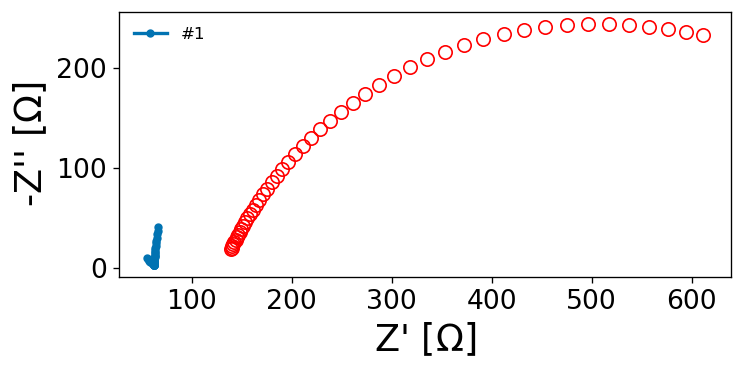

In [18]:
adj_re.EIS_plot(fitting = 'on')

In [10]:
adj_re.

[3.382611265291708]